Ejercicios de grafos
Del .mat file de coactivation_matriz, realizar los siguientes ejercicios

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
from IPython.core.pylabtools import figsize
from jedi.plugins.django import mapping

In [8]:
math_path = r"C:\Users\karim\OneDrive\Documentos\Python Scripts\Coactivation_matrix.mat"
contents = scipy.io.loadmat(math_path)
contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

1. Crear un dataframe con la información del ndarray de coactivation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas

In [9]:
data = contents['Coactivation_matrix']
df = pd.DataFrame(data)
df.index = df.index + 1  
df.columns = df.columns + 1 
print(df)

          1         2         3         4         5        6         7    \
1    0.000000  0.160714  0.111486  0.000000  0.138095  0.00000  0.000000   
2    0.160714  0.000000  0.068259  0.000000  0.042056  0.00000  0.000000   
3    0.111486  0.068259  0.000000  0.224199  0.000000  0.00000  0.000000   
4    0.000000  0.000000  0.224199  0.000000  0.000000  0.00000  0.039275   
5    0.138095  0.042056  0.000000  0.000000  0.000000  0.00000  0.000000   
..        ...       ...       ...       ...       ...      ...       ...   
634  0.053872  0.042105  0.161905  0.000000  0.000000  0.00000  0.000000   
635  0.049383  0.000000  0.103943  0.075697  0.000000  0.03876  0.000000   
636  0.000000  0.000000  0.034130  0.108787  0.000000  0.00000  0.105839   
637  0.050459  0.000000  0.000000  0.000000  0.103448  0.00000  0.000000   
638  0.101124  0.069231  0.000000  0.000000  0.053279  0.00000  0.000000   

          8    9         10   ...  629       630  631  632       633  \
1    0.000000  

2. Mostrar el heatmap de coativation_matrix 

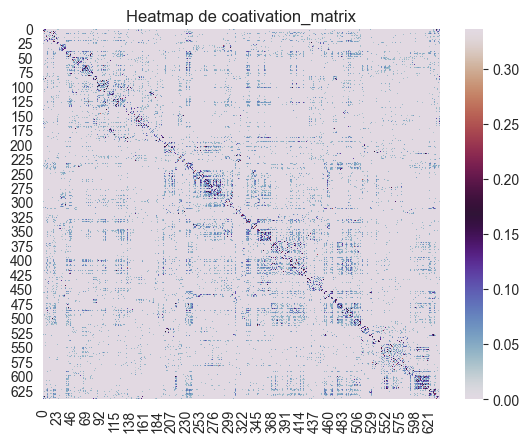

In [10]:
sns.heatmap(data, cmap='twilight')
plt.title("Heatmap de coativation_matrix")
plt.show()

3. Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30.

In [11]:
df = pd.DataFrame(data)
subset = df.iloc[9:30, 9:30] 
subset.index = range(10,31)
subset.columns = range(10,31)
print(subset)

          10        11        12        13        14        15        16  \
10  0.000000  0.054299  0.145251  0.000000  0.103286  0.000000  0.000000   
11  0.054299  0.000000  0.075000  0.035556  0.000000  0.000000  0.140940   
12  0.145251  0.075000  0.000000  0.000000  0.000000  0.053435  0.059701   
13  0.000000  0.035556  0.000000  0.000000  0.000000  0.000000  0.000000   
14  0.103286  0.000000  0.000000  0.000000  0.000000  0.043478  0.055215   
15  0.000000  0.000000  0.053435  0.000000  0.043478  0.000000  0.000000   
16  0.000000  0.140940  0.059701  0.000000  0.055215  0.000000  0.000000   
17  0.000000  0.000000  0.000000  0.036697  0.034398  0.000000  0.000000   
18  0.068627  0.107784  0.000000  0.033175  0.087209  0.034247  0.115108   
19  0.000000  0.046414  0.032864  0.170833  0.037344  0.000000  0.000000   
20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22  0.000000

4. Mostrar el heatmap del nuevo dataframe

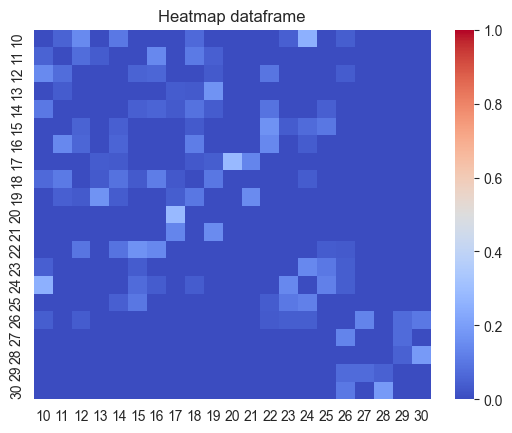

In [12]:
sns.heatmap(subset, vmin=0,vmax=1,cmap="coolwarm")
plt.title("Heatmap dataframe")
plt.show()

5. Crear el grafo dirigido del nuevo dataframe

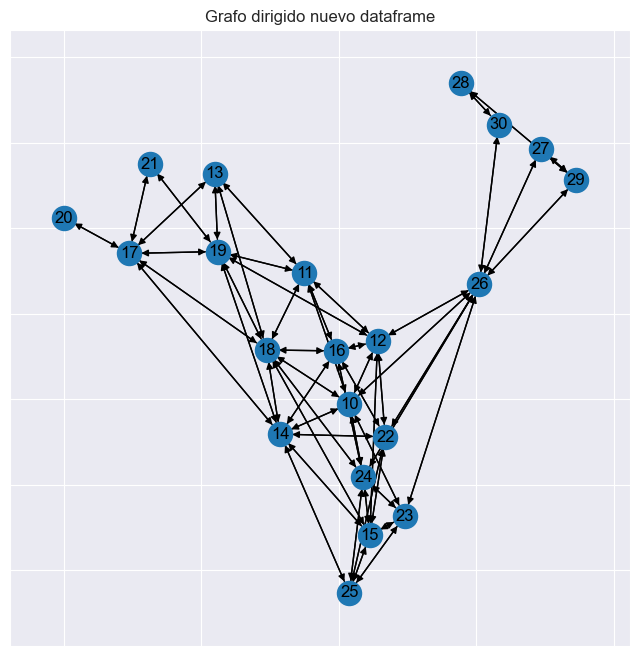

In [13]:
import networkx as nx
df_grafo = pd.DataFrame(subset)
G_grafo = nx.from_pandas_adjacency(df_grafo, create_using=nx.DiGraph())

plt.figure(figsize = (8,8))
pos = nx.spring_layout(G_grafo)
nx.draw_networkx(G_grafo, pos=pos, with_labels=True)

plt.title("Grafo dirigido nuevo dataframe")
plt.show()

6. ¿Qué nodo tiene más conexiones del nuevo dataframe?

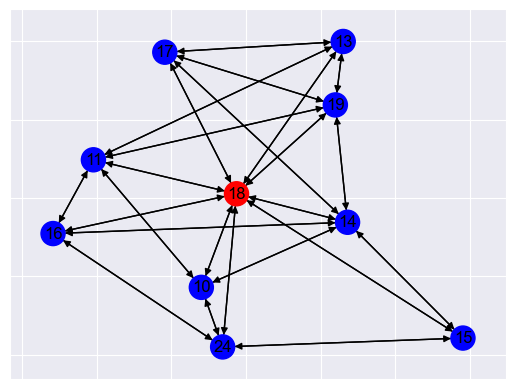

In [14]:
G = G_grafo.copy()
masconectado = max(G.degree, key=lambda x: x[1])[0]

grafo_nodo = G.subgraph([masconectado] + list(G.successors(masconectado)) + list(G.predecessors(masconectado)))

pos = nx.spring_layout(grafo_nodo)
color_nodo = ["red" if node == masconectado else "blue" for node in grafo_nodo]
nx.draw_networkx(grafo_nodo, pos=pos, with_labels=True, node_color=color_nodo)
plt.show()

7. Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)

In [15]:
array = pd.DataFrame(data)
print(array.values)
# Cálculo de quantiles 
quantiles = array.quantile([0.25, 0.5, 0.75])
print(quantiles)

[[0.         0.16071429 0.11148649 ... 0.         0.05045872 0.1011236 ]
 [0.16071429 0.         0.06825939 ... 0.         0.         0.06923077]
 [0.11148649 0.06825939 0.         ... 0.03412969 0.         0.        ]
 ...
 [0.         0.         0.03412969 ... 0.         0.         0.        ]
 [0.05045872 0.         0.         ... 0.         0.         0.09777778]
 [0.1011236  0.06923077 0.         ... 0.         0.09777778 0.        ]]
      0    1    2    3    4    5    6    7    8    9    ...  628  629  630  \
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

      631  632  633  634  635  636  637  
0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
0.75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 638 columns]


8. Mostrar el histograma de distribución de valores de la matriz de coativación

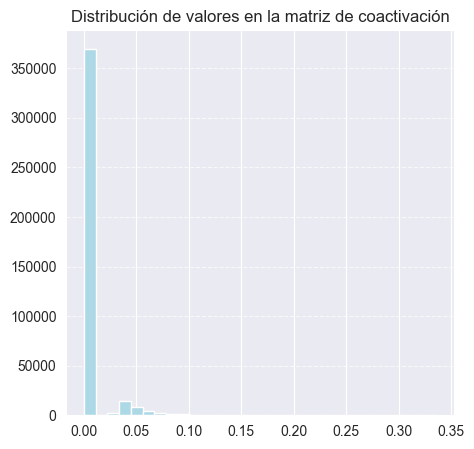

In [38]:
coactivation_matrix = contents["Coactivation_matrix"]
values = coactivation_matrix.flatten()

plt.figure(figsize=(5,5))
plt.hist(values, bins=30, color="lightblue")
plt.title("Distribución de valores en la matriz de coactivación")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


9. Filtre el nuevo dataframe usando como threshold el valor de 0, es decir, binarizar la matriz de coactivación con valores mayores a 0.

In [17]:
filtrado_df = array[(array > quantiles.loc[0.25]) & ( array < quantiles.loc[0.5])].dropna()
print(filtrado_df)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 638 columns]
